In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sub=pd.read_csv("/content/sample_submission.csv")

In [ ]:
train=pd.read_csv("/content/Train.csv")

In [ ]:
test=pd.read_csv("/content/Test.csv")

In [ ]:
train

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


In [ ]:
y=train.pop("PE")

In [ ]:
data=pd.concat([train,test],ignore_index=False)

In [ ]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

In [ ]:
train.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

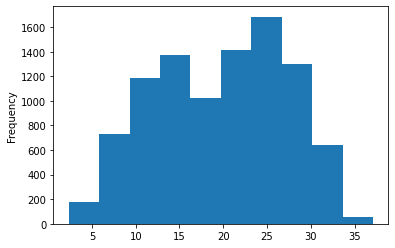

In [ ]:
train["AT"].plot.hist()
#test["AT"].plot.hist()

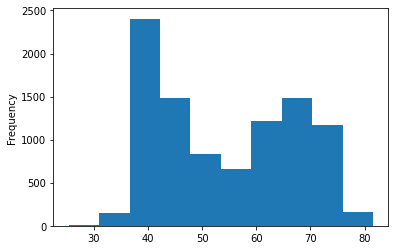

In [ ]:
train["V"].plot.hist()
#test["V"].plot.hist()

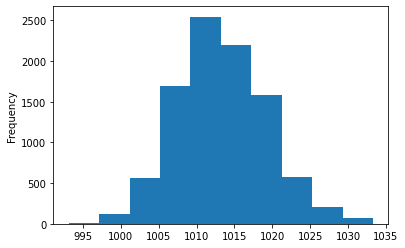

In [ ]:
train["AP"].plot.hist()
#test["AP"].plot.hist()

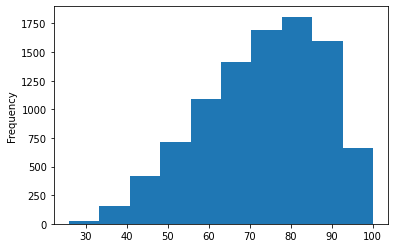

In [ ]:
train["RH"].plot.hist()
#test["RH"].plot.hist()

In [ ]:
train.describe()

,AT,V,AP,RH
count,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178
std,7.407995,12.679972,5.906082,14.618969
min,2.340000,25.360000,993.110000,25.890000
25%,13.560000,41.780000,1009.210000,62.990000
50%,20.550000,52.750000,1013.030000,74.855000
75%,25.770000,66.560000,1017.342500,84.790000
max,37.110000,81.560000,1033.300000,100.160000


In [ ]:
test.corr()

,AT,V,AP,RH
AT,1.000000,0.844612,-0.505931,-0.542757
V,0.844612,1.000000,-0.413164,-0.313609
AP,-0.505931,-0.413164,1.000000,0.095660
RH,-0.542757,-0.313609,0.095660,1.000000


In [ ]:
train.corr()

,AT,V,AP,RH
AT,1.000000,0.842054,-0.514305,-0.541602
V,0.842054,1.000000,-0.415093,-0.306395
AP,-0.514305,-0.415093,1.000000,0.115454
RH,-0.541602,-0.306395,0.115454,1.000000


# BASELINE (LAZY REGRESSOR)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainxx,y,test_size=.33,random_state =123)

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 74%|███████▍  | 29/39 [00:46<00:17,  1.79s/it]

In [ ]:
models

# VISUALIZATION

In [ ]:
train.head(3)

,AT,V,AP,RH
0,29.07,72.51,1009.24,58.38
1,32.38,67.17,1006.97,60.04
2,19.29,67.71,1007.94,63.71


In [ ]:
train.AT.skew()

-0.14902418781989937

In [ ]:
train.V.skew()

0.17709634866012616

In [ ]:
data["V"]=(np.log1p(data.V))

In [ ]:
train.AP.skew()

0.24019659756669504

In [ ]:
data.AP=np.log1p(data.AP)

In [ ]:
train.RH.skew()

-0.4235105703119026

In [ ]:
data.RH=np.square(data.RH)

In [ ]:
data

,AT,V,AP,RH
0,29.07,4.297421,6.917943,3408.2244
1,32.38,4.222005,6.915694,3604.8016
2,19.29,4.229895,6.916656,4058.9641
3,16.45,3.749033,6.925241,2043.9441
4,21.43,3.870576,6.922585,3751.5625
...,...,...,...,...
38267,14.60,4.004055,6.924888,4202.9289
38268,29.67,4.212276,6.924219,1162.8100
38269,20.13,3.871826,6.921254,6893.9809
38270,27.14,4.267177,6.915803,5340.6864


# FEATURE ENGINEERING

In [ ]:
data["AP/V"]=data["AP"]/data["V"]

In [ ]:
data["AP/V*RH"]=data["AP/V"]*data["RH"]

In [ ]:
data["AP/V%"]=data["AP/V"]*100

In [ ]:
data["AP/V2"]=np.square(data["AP/V"])

In [ ]:
data["AP/V3"]=np.power(data["AP/V"],3)

In [ ]:
data["AP/V4"]=np.power(data["AP/V"],4)

In [ ]:
data["V/AP"]=data["V"]/data["AP"]

In [ ]:
data["AT*RH"]=data["AT"]*data["RH"]

In [ ]:
data["AP-V/V"]=(data["AP"]-data["V"])/data["V"]

In [ ]:
data["AP-V/V%"]=data["AP-V/V"]*100

In [ ]:
data["P"]=data["V"]+data["AP"]

In [ ]:
data["P/v"]=data["P"]/data["V"]

In [ ]:
data["P/AP"]=data["P"]/data["AP"]

In [ ]:
data["P/V2"]=np.square(data["P/v"])

In [ ]:
data["P_diff"]=data["AP"]-data["V"]

In [ ]:
data["sss"]=data["P"]/data["P_diff"]

In [ ]:
data["yy"]=data["P_diff"]/data["P"]

In [ ]:
data["AP*V"]=data["AP"]*data["V"]

In [ ]:
data["fff"]=data["AP*V"]/data["AP/V"]

In [ ]:
data["V-unit"]=data["V"]*13.33

In [ ]:
data["AP/V-mili"]=data["AP/V"]/13.33

In [ ]:
data["V/AP-mili"]=data["V/AP"]*13.33

In [ ]:
data["different"]=(-data["AP"])+data["V-unit"]

In [ ]:
data["AP/V2=mili"]=data["AP/V"]/(13.33*13.33)

In [ ]:
data["AP/V2=mili%"]=data["AP/V2=mili"]*100

In [ ]:
data["AP/Vyy"]=data["AP/V"]*data["yy"]

In [ ]:
data["dddd"]=data["AP/V"]*13.33

# TRAIN

In [ ]:
trainxx=data[:9568]
testxx=data[9568:]

In [ ]:
trainxx[0:2]

,AT,V,AP,RH,AP/V,AP/V*RH,AP/V%,AP/V2,AP/V3,AP/V4,V/AP,AT*RH,AP-V/V,AP-V/V%,P,P/v,P/AP,P/V2,P_diff,sss,yy,AP*V,fff,V-unit,AP/V-mili,V/AP-mili,different,AP/V2=mili,dddd
0,29.07,4.297421,6.917943,3408.2244,1.609789,5486.523278,160.978933,2.591422,4.171643,6.715466,0.621199,99077.083308,0.609789,60.978933,11.215365,2.609789,1.621199,6.811000,2.620522,4.279821,0.233655,29.729318,18.467831,57.284628,0.120764,8.280587,50.366685,0.009060,21.458492
1,32.38,4.222005,6.915694,3604.8016,1.638012,5904.707861,163.801188,2.683083,4.394922,7.198934,0.610496,116723.475808,0.638012,63.801188,11.137698,2.638012,1.610496,6.959107,2.693689,4.134738,0.241853,29.198090,17.825323,56.279321,0.122882,8.137914,49.363627,0.009218,21.834698


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
scaler_y=StandardScaler()
trainx=scaler_x.fit_transform(trainxx)
testx=scaler_x.transform(testxx)
tar=scaler_y.fit_transform((np.array(y)).reshape(-1,1))

In [ ]:
from sklearn.model_selection import cross_val_score

# BASELINE/FINE-TUNE

In [ ]:
#-2.528592197626728 without fine tune

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etc=ExtraTreesRegressor()
scores = cross_val_score(etc, trainxx,y, cv = 5, scoring = "neg_root_mean_squared_error")
scores.mean()

-2.5291322080797025

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etc=ExtraTreesRegressor(n_estimators=800)
etc.fit(trainxx,y)
pred=etc.predict(testxx)
sub["PE"]=(pred)
sub.to_csv("sub20.csv",index=False)

In [ ]:
pd.DataFrame([trainxx.columns,etc.feature_importances_])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,AT,V,AP,RH,AP/V,AP/V*RH,AP/V%,AP/V2,AP/V3,AP/V4,V/AP,AT*RH,AP-V/V,AP-V/V%,P,P/v,P/AP,P/V2,P_diff,sss,yy,AP*V,fff,V-unit,AP/V-mili,V/AP-mili,different
1,0.280067,0.0334879,0.0117814,0.00598253,0.0334392,0.00581725,0.0314145,0.020829,0.0287245,0.0301587,0.026267,0.0161391,0.0357643,0.0222412,0.0173258,0.035266,0.0348634,0.0298865,0.0399763,0.0325841,0.0345669,0.0260679,0.0399641,0.0368305,0.0349225,0.0307946,0.0248373
